## Financial Big Data Project : Impact of Louvain clustering on GMVP strategy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_cleaning import load_trade
from refreshTime import harmoniz_data,refresh_time_without_dask,synchro_data,refresh_time_dask
from back_test import daily_back_testing,impor_data
import seaborn as sns
import time

import dask
dask.config.set(scheduler="processes")

Date = pd.bdate_range('2010-01-01','2010-12-31')[1:] #We do not take the 1er January where there is no trades
Market_name = np.array(['AAPL.OQ','AMGN.OQ','AXP.N','BA.N','CAT.N','CSCO.OQ','CVX.N','DOW.N','GS.N','SPY.P','UTX.N','V.N','WMT.N'])

folder_path = 'D:/GitHub/ML_For_Finance/big data/data/data/'

#folder_path ='D:/GitHub/ML for Finance project/ML_For_Finance/big data/Data/data/'
#folder_path = '/Users/franckatteaka/Desktop/cours/Semester III/Financial big data/high freq data/'

## Section 2 : Data Analysis

In [11]:
n=len(Date)
m=len(Market_name)
market_size = np.zeros((n,m))

for i in range(n):
    temp = impor_data(Market_name,Date[i],folder_path)
    for j in range(m):
        market_size[i,j]=len(temp[j])


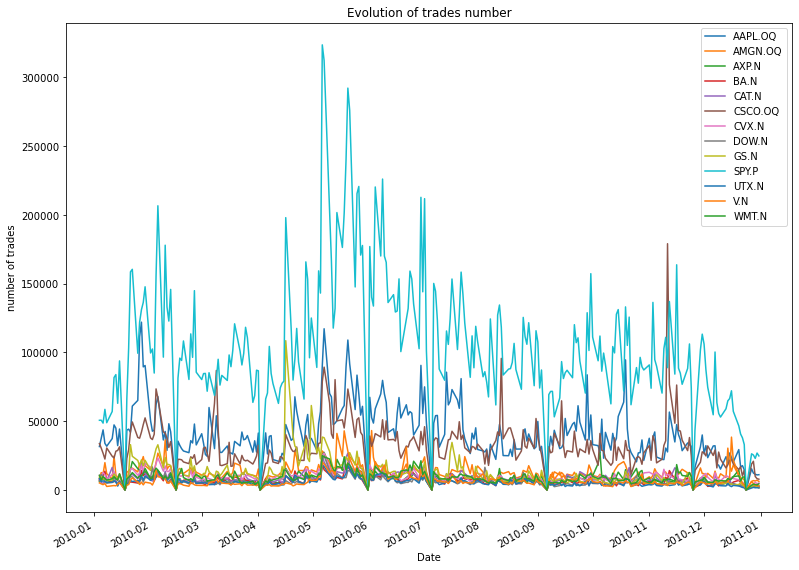

In [12]:
plt.figure(figsize=(13,10))
for j in range(m):
    plt.plot(Date,market_size[:,j],label=Market_name[j])
    
plt.legend()
plt.ylabel("number of trades")
plt.xlabel('Date')
plt.title('Evolution of trades number')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/number_trades.pdf')

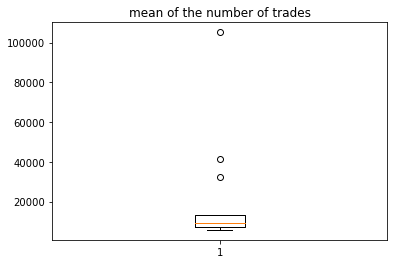

,mean trades
AAPL.OQ,41213.073077
AMGN.OQ,13022.373077
AXP.N,8417.542308
BA.N,6781.303846
CAT.N,8532.884615
CSCO.OQ,32440.665385
CVX.N,9982.492308
DOW.N,6068.430769
GS.N,12532.361538
SPY.P,105240.903846


In [13]:
mean_number = np.mean(market_size,axis=0)
plt.boxplot(mean_number)
plt.title('mean of the number of trades')
plt.savefig('figures/boxplot mean number of trades.pdf')
plt.show()
DF = pd.DataFrame(data=mean_number[np.newaxis,:].T,index=Market_name,columns=['mean trades'])
DF

In [14]:
num_0 =0
for i in range(n):
    if min(market_size[i])==0:
        num_0+=1
print('number of day where at least one market has 0 trades :',num_0)

number of day where at least one market has 0 trades : 8


D:\Python_file\envs\spyder_RL\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


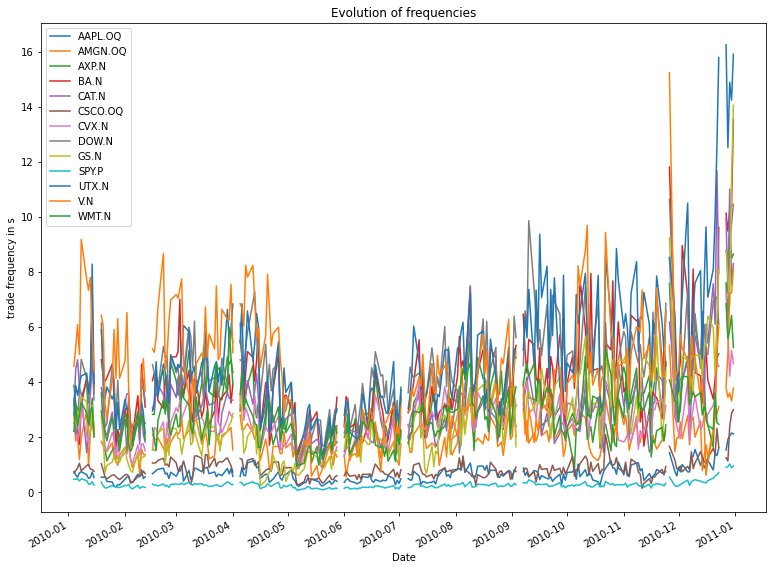

In [16]:
time_1d = 60*60*6.5

freq = time_1d/market_size

plt.figure(figsize=(13,10))
for j in range(m):
    plt.plot(Date,freq[:,j],label=Market_name[j])
    
plt.legend()
plt.ylabel("trade frequency in s")
plt.xlabel('Date')
plt.title('Evolution of frequencies')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/trades_frequency.pdf')

In [21]:
indice = np.argmax(market_size[:,9])
print('date with the more data : ',Date[indice])
start_time = time.time()
impor_data(Market_name,Date[indice],folder_path)
t = time.time()-start_time
print('maximum time to load all market trades with dask : %f seconds'%(t))


date with the more data :  2010-05-06 00:00:00
maximum time to load all market trades with dask : 2.066412 seconds


## Section 3 : Data synchronisation

In [5]:
n=len(Date)
m=len(Market_name)
tau = np.zeros((n))

for i in range(n):
    temp1 = impor_data(Market_name,Date[i],folder_path)
    if min([len(df) for df in temp1])>0:
        temp2 = refresh_time_dask(temp1,Date[i])
        tau[i]=len(temp2)
    else :
        tau[i]=0

No handles with labels found to put in legend.


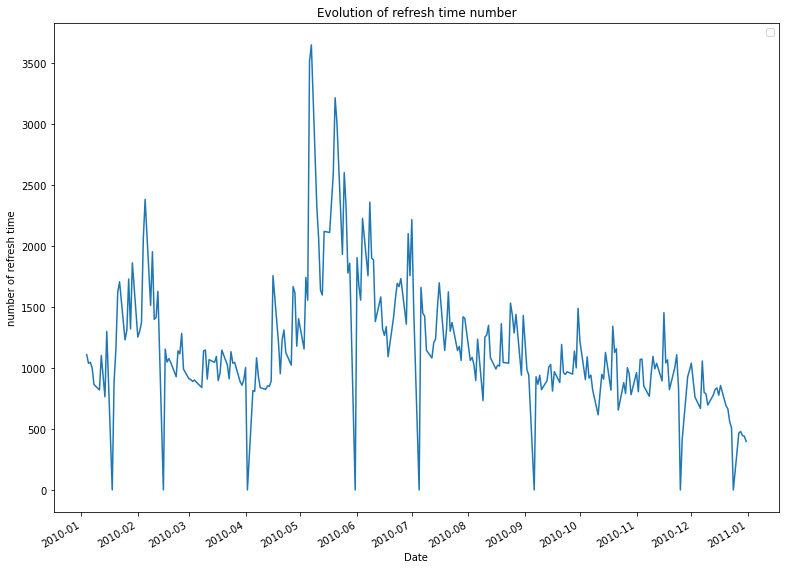

In [8]:
plt.figure(figsize=(13,10))

plt.plot(Date,tau)
    
plt.legend()
plt.ylabel("number of refresh time")
plt.xlabel('Date')
plt.title('Evolution of refresh time number')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        
plt.gcf().autofmt_xdate()
plt.savefig('figures/number_refresh_time.pdf')

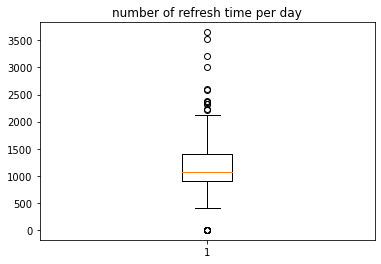

In [16]:
plt.boxplot(tau)
plt.title('number of refresh time per day')
plt.savefig('figures/boxplot number of refresh time per day.pdf')
plt.show()

In [17]:
print('mean of refresh time number :',np.mean(tau))
print('std of refresh time number :',np.std(tau))

mean of refresh time number : 1182.8153846153846
std of refresh time number : 527.7971169743072


In [18]:
tau_5 = tau[:-4]+tau[1:-3]+tau[2:-2]+tau[3:-1]+tau[4:]

In [20]:
print('mean of refresh time number on 5 business day:',np.mean(tau_5))
print('std of refresh time number on 5 business day:',np.std(tau_5))

mean of refresh time number on 5 business day: 5948.140625
std of refresh time number on 5 business day: 2160.212009395631


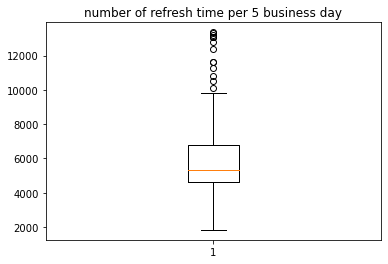

In [21]:
plt.boxplot(tau_5)
plt.title('number of refresh time per 5 business day')
plt.savefig('figures/boxplot number of refresh time per 5 business day.pdf')
plt.show()

In [2]:
indice=88
print('date with the more data : ',Date[indice])

date with the more data :  2010-05-06 00:00:00


In [3]:
temp_t = impor_data(Market_name,Date[indice],folder_path)
start_time = time.time()

refresh_time_dask(temp_t,Date[indice])
t = time.time()-start_time
print('maximum time to refresh times with dask : %f seconds'%(t))

maximum time to refresh times with dask : 63.697050 seconds


In [7]:
temp_t = impor_data(Market_name,Date[indice],folder_path)
start_time = time.time()

refresh_time_without_dask(temp_t)
t = time.time()-start_time
print('maximum time to refresh times without dask : %f seconds'%(t))

maximum time to refresh times without dask : 1318.064334 seconds


In [4]:

start_time = time.time()
temp_t = impor_data(Market_name,Date[indice],folder_path)
harmoniz_data(temp_t,Date[indice])
t = time.time()-start_time
print('maximum time to load data, get refresh times and synchronize datas with dask: %f seconds'%(t))
print('maximum time to load data, get refresh times and synchronize datas with dask: %d minutes %f seconds'%(int(t/60),t%60))

maximum time to load data, get refresh times and synchronize datas with dask: 842.779993 seconds


maximum time to load data, get refresh times and synchronize datas with dask: 14 minutes 2.779993 seconds


## Section 4 Louvain and GMVP performance

In [18]:
def strategy_train_test(n_day_init):
    
    nday_end=len(Date)-1
    Time=[]
    start_time = time.time()
    backtesting1=daily_back_testing(Market_name,folder_path,Date[:n_day_init])
    Time.append(time.time()-start_time)
    l=nday_end-n_day_init
    c=0
    for i in range(n_day_init,nday_end+1):
        start_time = time.time()
        backtesting1.daily_update(Date[i])
        Time.append(time.time()-start_time)
        if (i-n_day_init)/l > c:
            print('avancement : %f  pourcentage'%((i-n_day_init)/l))
            c+=0.05
    return backtesting1,Time

def nb_label(backtesting1,titre):
    plt.figure(figsize=(13,10))

    plt.plot(backtesting1.date_path[1:],backtesting1.number_cluster)

    plt.legend()
    plt.ylabel("number of clusters"+titre)
    plt.xlabel('Date')
    plt.title('Evolution of Louvain cluster '+titre)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    plt.gcf().autofmt_xdate()
    plt.savefig('figures/number_louvain_cluster '+titre+'.pdf')
    plt.show()
    return

def get_diff_ret(backtesting1,titre):
    diff_return = np.array(backtesting1.louvain_return)-np.array(backtesting1.vanilla_return)
    plt.boxplot(diff_return)
    plt.title('difference of return '+titre)
    plt.savefig('figures/boxplot difference ret '+titre+'.pdf')
    plt.show()
    return

def get_perf(backtesting1):
    n=len(backtesting1.louvain_return)
    temp=[backtesting1.louvain_return[i]==backtesting1.vanilla_return[i] for i in range(n)]
    print('number of time where the number of louvain cluster is 1 :', sum(temp))
    print('rate of time where the number of louvain cluster is 1 :', sum(temp)/n)
    print('\n')
    
    print('mean of louvain return : ',np.mean(backtesting1.louvain_return))
    print('mean of vanilla return : ',np.mean(backtesting1.vanilla_return))
    print('\n')
    
    print('std of louvain return : ',np.std(backtesting1.louvain_return))
    print('std of vanilla return : ',np.std(backtesting1.vanilla_return))
    return

def get_rate_same_cluster(backtesting1,titre):
    plt.figure(figsize=(13,10))
    sns.heatmap(backtesting1.louvain_cluster/backtesting1.nombre_test,vmin=0, vmax=1,annot=True)
    plt.title('rate where two asset are in the same cluster'+titre)
    plt.savefig('figures/rate_two_assets_in_the_same_cluster'+titre+'.pdf')
    plt.show()
    return

def get_corr_av(backtesting1,titre):
    plt.figure(figsize=(13,10))
    sns.heatmap(backtesting1.correlation/backtesting1.nombre_test,vmin=-1, vmax=1,annot=True)
    plt.title('average correlation between assets'+titre)
    plt.savefig('figures/correlation_heatmap'+titre+'.pdf')
    plt.show()
    return


def get_graphs_perf(backtesting1,titre):
    backtesting1.plot_value(titre)
    
    nb_label(backtesting1,titre)
    get_diff_ret(backtesting1,titre)
    get_perf(backtesting1)
    get_rate_same_cluster(backtesting1,titre)
    get_corr_av(backtesting1,titre)
    return 
    
    
def get_time_evo(n_day_init,Time,titre):
    
    plt.figure(figsize=(13,10))
    xdate = Date[n_day_init:]
    t=Time[0]
    print('the time to initialise the strategy is : %d minutes %f seconds'%(int(t/60),t%60))
    plt.plot(xdate,Time[1:])
    plt.ylabel('seconds')
    plt.xlabel('date')
    plt.title('Time computation for each update ' +titre)
    plt.savefig('figures/Time computation strat '+titre+'.pdf')
    plt.show()
    return

avancement : 0.003876  pourcentage
avancement : 0.050388  pourcentage
avancement : 0.100775  pourcentage
avancement : 0.151163  pourcentage
avancement : 0.201550  pourcentage
avancement : 0.251938  pourcentage
avancement : 0.302326  pourcentage
avancement : 0.352713  pourcentage
avancement : 0.403101  pourcentage
avancement : 0.453488  pourcentage
avancement : 0.500000  pourcentage
avancement : 0.550388  pourcentage
avancement : 0.600775  pourcentage
avancement : 0.651163  pourcentage
avancement : 0.701550  pourcentage
avancement : 0.751938  pourcentage
avancement : 0.802326  pourcentage
avancement : 0.852713  pourcentage
avancement : 0.903101  pourcentage
avancement : 0.953488  pourcentage


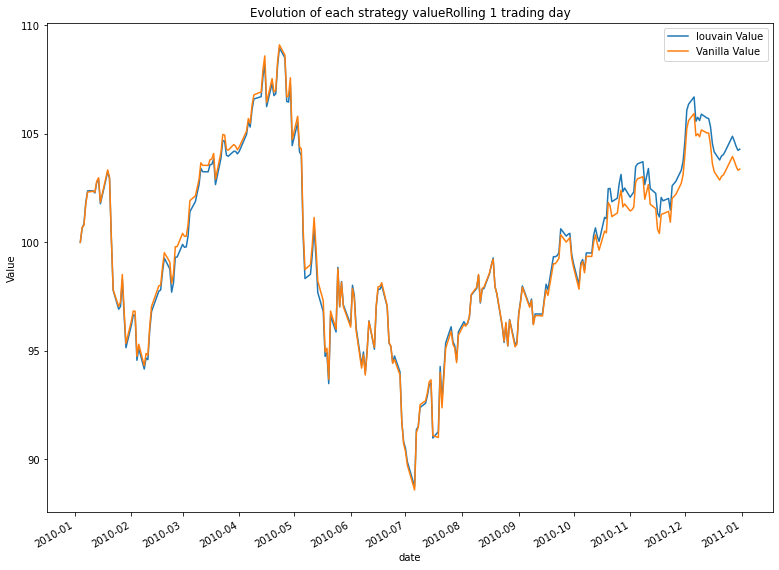

No handles with labels found to put in legend.


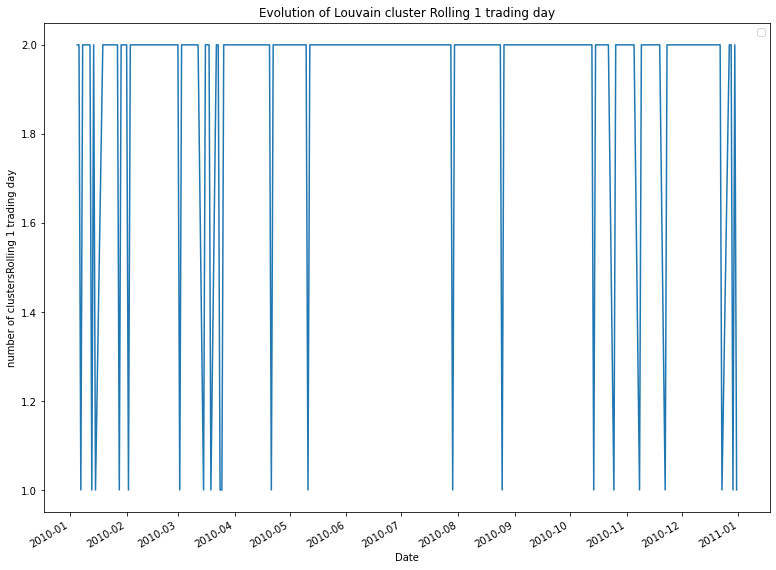

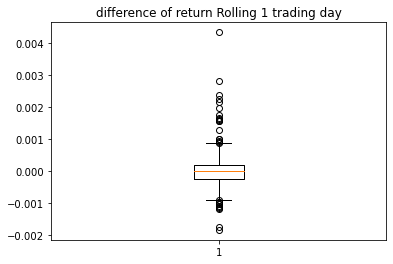

number of time where the number of louvain cluster is 1 : 21
rate of time where the number of louvain cluster is 1 : 0.08366533864541832


std of louvain return :  0.00021814001266445599
std of vanilla return :  0.00018276252657341055


std of louvain return :  0.01005135386663524
std of vanilla return :  0.010030587064699316


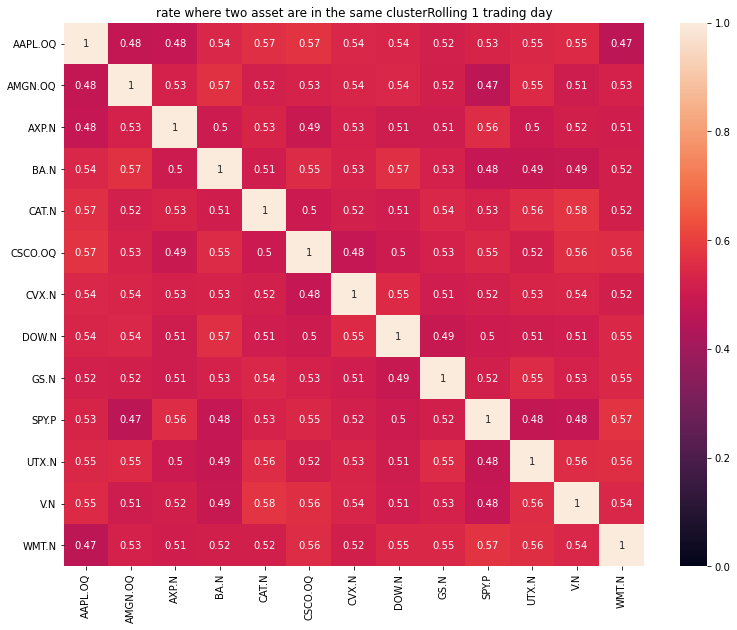

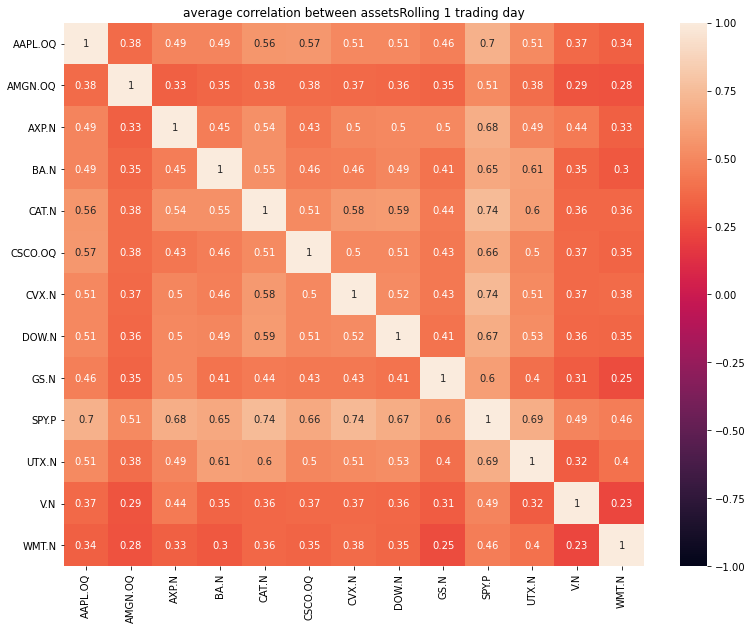

In [11]:
backtest_1J,Time = strategy_train_test(1)


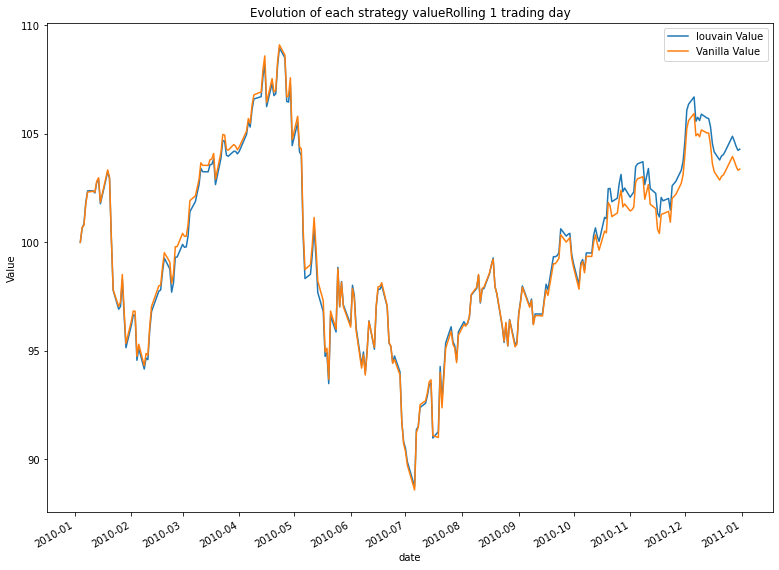

No handles with labels found to put in legend.


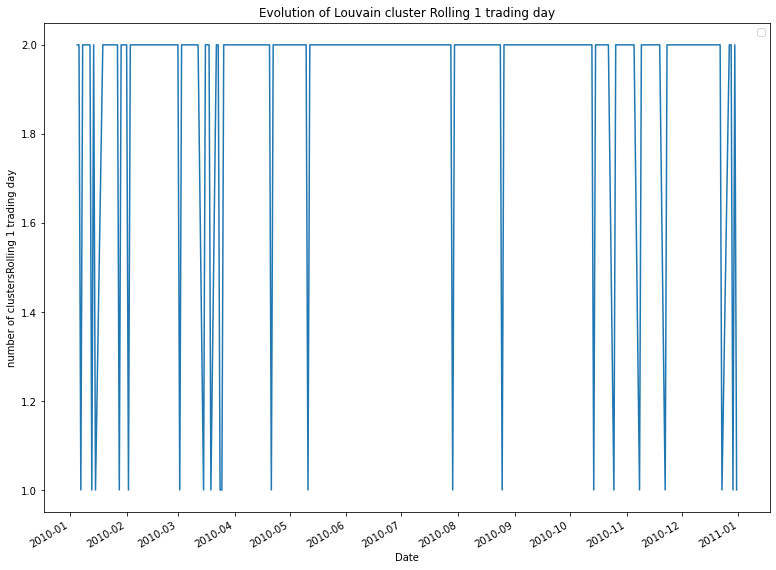

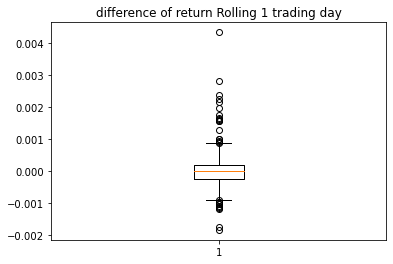

number of time where the number of louvain cluster is 1 : 21
rate of time where the number of louvain cluster is 1 : 0.08366533864541832


mean of louvain return :  0.00021814001266445599
mean of vanilla return :  0.00018276252657341055


std of louvain return :  0.01005135386663524
std of vanilla return :  0.010030587064699316


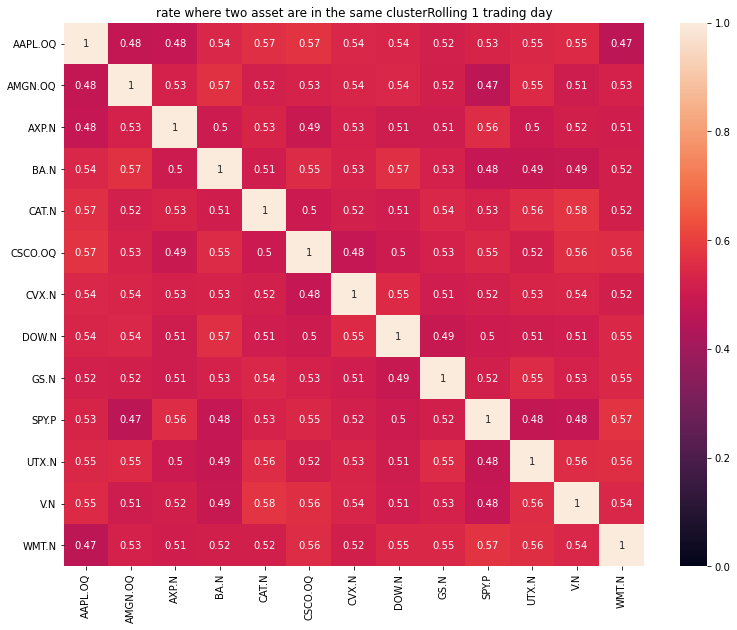

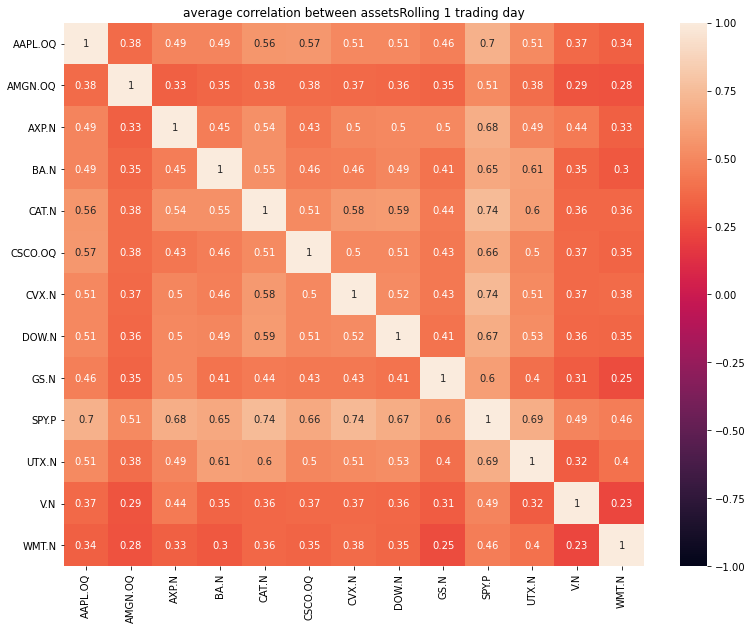

In [17]:
titre = 'Rolling 1 trading day'
get_graphs_perf(backtest_1J,titre)

the time to initialise the strategy is : 0 minutes 44.267143 seconds


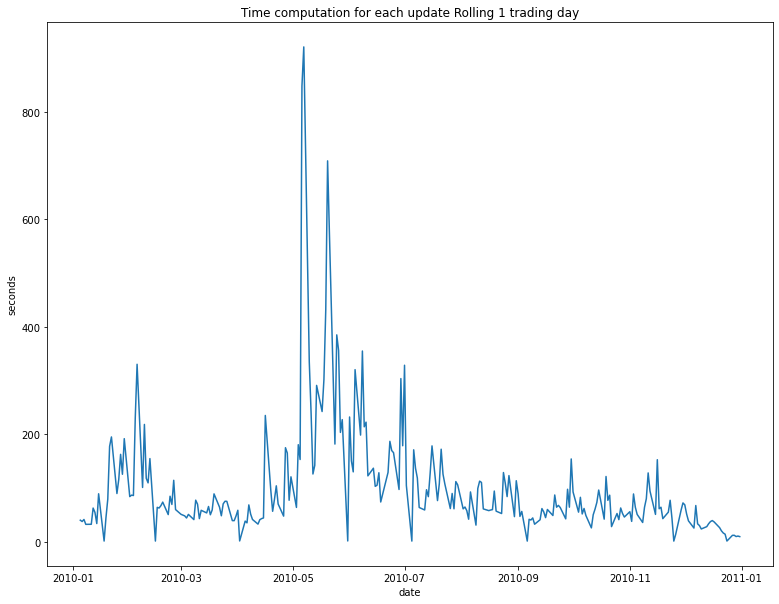

In [19]:
get_time_evo(1,Time,titre)

In [15]:
np.mean(Time[1:])

101.62988112607978

In [ ]:
backtest_20J,Time = strategy_train_test(20)

avancement : 0.004184  pourcentage
avancement : 0.050209  pourcentage
avancement : 0.100418  pourcentage
avancement : 0.150628  pourcentage
avancement : 0.200837  pourcentage
avancement : 0.251046  pourcentage
avancement : 0.301255  pourcentage


In [ ]:
titre = 'Rolling 20 trading day'
get_graphs_perf(backtest_20J,titre)

In [ ]:
get_time_evo(20,Time,titre)